In [1]:
%matplotlib notebook
import stingray.events as ev
import stingray.lightcurve as lc
import matplotlib.pyplot as plt
from stingray import io
from astropy.io import fits
import stingray.powerspectrum as powspec 
import stingray.crossspectrum as crossspec
import numpy as np
import pickle
import seaborn as sns

sns.set_context('talk')
# sns.set_style("whitegrid")
sns.set_palette("colorblind")

buff = 100

# data_dir = '/Volumes/LaCie/AstroData/J1739-285/nustar/timing/matteo_corrections/'
data_dir = '/disk/lif2/spike/J1739m285/timing/'
# plot_dir = '/Users/sean/Desktop/J1739-285/matteo_corrections/'
plot_dir = '/disk/lif2/spike/J1739m285/figures/'
# def flare_search(lc, threshold_sigma=1.5):
    

# Folding Search

In [2]:
ev_files = [fits.open(data_dir + 'nu90501343002A01_cl_regfilt_barycorr.evt'), \
            fits.open(data_dir + 'nu90501343002B01_cl_regfilt_barycorr.evt')]
events = []
for file in ev_files:
    ev_data = file[1].data
    ev_gti = file[2].data
    new_gti = [[x,y] for x,y in ev_gti]
    buffered_gti = []
    for x,y in ev_gti:
        if np.abs(y-x) > 2*buff:
            buffered_gti.append([x+buff, y-buff])
    # print(new_gti)
    events.append(ev.EventList(time=ev_data['TIME'], gti=buffered_gti, pi = ev_data['PI'], \
                       mjdref=file[0].header['MJDREFI'] + file[0].header['MJDREFF']))
    file.close()

# print(events[0].time)

# FFT Search

<IPython.core.display.Javascript object>


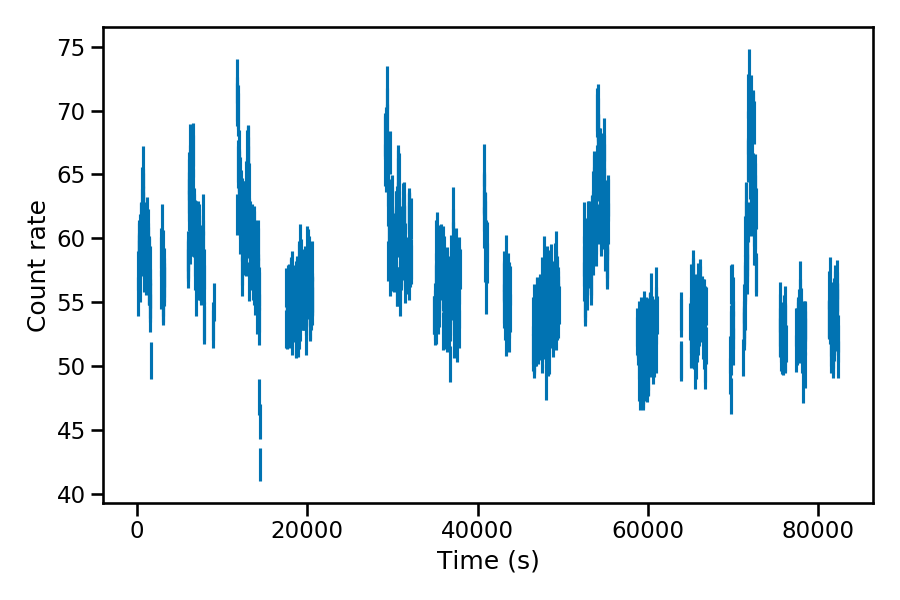

In [3]:
curve_bin = 25
plt.ion()
curve_pretty = events[0].to_lc(dt=curve_bin)
plt.figure(figsize=(9,6))
plt.errorbar(curve_pretty.time-np.min(events[0].time), curve_pretty.counts/curve_pretty.dt, yerr=curve_pretty.counts_err/curve_pretty.dt, fmt='none')
plt.xlabel('Time (s)')
plt.ylabel('Count rate')
plt.tight_layout()
# plt.savefig(plot_dir + 'light_curve_FPMA.pdf')


In [4]:
ms_bin = 0.00025
curves = [events[0].to_lc(dt = ms_bin), events[1].to_lc(dt = ms_bin)]
curves[0].write(data_dir + 'nu90501343002A01_cl_regfilt_barycorr_buffered_lc_ms.hdf', format_='hdf5')
curves[1].write(data_dir + 'nu90501343002B01_cl_regfilt_barycorr_buffered_lc_ms.hdf', format_='hdf5')

# curves=[]

# temp_dict = io.read('/Volumes/LaCie/AstroData/J1739-285/nustar/timing/nu90501343002A01_cl_regfilt_tc_bc_buffered_lc_ms.hdf', format_='hdf5')
# curves.append(lc.Lightcurve(time=temp_dict['time'], counts=temp_dict['counts'], gti=temp_dict['gti'], mjdref=temp_dict['mjdref'], dt=temp_dict['dt']))

# temp_dict = io.read('/Volumes/LaCie/AstroData/J1739-285/nustar/timing/nu90501343002B01_cl_regfilt_tc_bc_buffered_lc_ms.hdf', format_='hdf5')
# curves.append(lc.Lightcurve(time=temp_dict['time'], counts=temp_dict['counts'], gti=temp_dict['gti'], mjdref=temp_dict['mjdref'], dt=temp_dict['dt']))

# temp_dict=None


/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


## Cospectra

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Lightcurves do not have same tseg. This means that the datafrom the two channels are not completely in sync. This might or might not be an issue. Keep an eye on it.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kw

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.eg

<IPython.core.display.Javascript object>


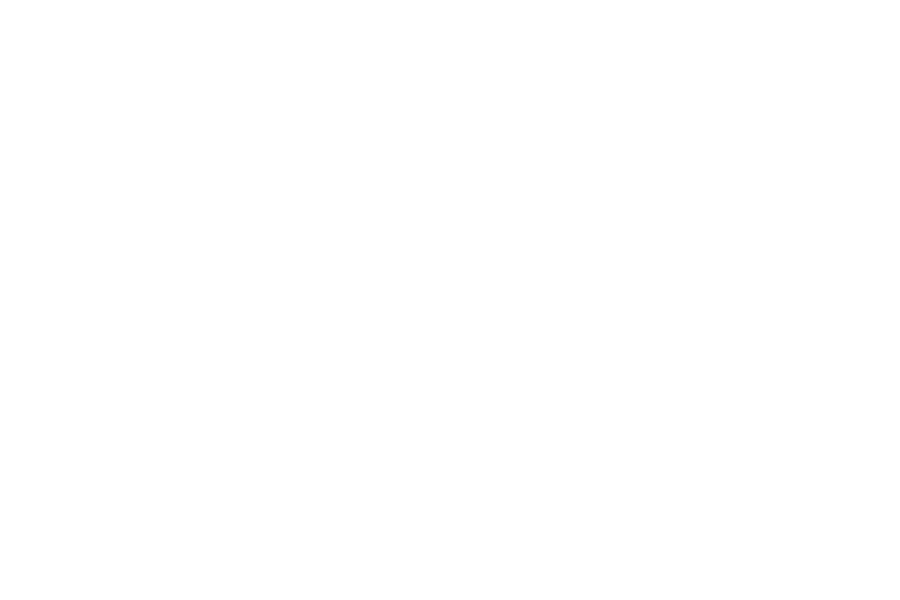

/Users/sean/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [5]:
averaged_cross = crossspec.AveragedCrossspectrum(curves[0], curves[1], 100).rebin(1.0)
plt.figure(figsize=(9,6))
plt.errorbar(averaged_cross.freq, averaged_cross.power, xerr=averaged_cross.df/2, fmt='')
plt.axvline(1122, ls='--', color='red')
plt.xlim(0,2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig(plot_dir + 'cross_spectrum_averaged_100s.pdf')
plt.close()

## Dynamic Power Spectra 

In [7]:
dynam_spec_A = powspec.DynamicalPowerspectrum(curves[0], 100)
dynam_spec_A.rebin_frequency(1.0)



/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


In [9]:
plt.ioff()
for i, ps in enumerate(dynam_spec_A.dyn_ps.T):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
    ax1.errorbar(dynam_spec_A.freq, ps.T, xerr=dynam_spec_A.df/2, fmt='')
    ax1.axvline(1122, ls='--', color='red')
    ax1.set_xlim(0,2000)
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Power')
    ax2.errorbar(curve_100s.time-np.min(events.time), curve_100s.counts/curve_100s.dt, yerr=curve_100s.counts_err/curve_100s.dt, fmt='none')
    ax2.axvspan(dynam_spec_A.time[i]-np.min(events.time)-50,dynam_spec_A.time[i]-np.min(events.time)+50,  facecolor='red', alpha = 0.2)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel(r'$\mathrm{Count\ rate\ (s^{-1})}$')
    plt.tight_layout()
    plt.savefig(plot_dir + 'DynamSpec_100s/power_spectrum_segment' + str(i) + '.pdf')
    plt.close()

In [10]:
averaged_spec = powspec.AveragedPowerspectrum(curve, 100).rebin(df=1.0)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax1.errorbar(averaged_spec.freq, averaged_spec.power, xerr=averaged_spec.df/2, fmt='')
ax1.axvline(1122, ls='--', color='red')
ax1.set_xlim(0,2000)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Power')
ax2.errorbar(curve_100s.time-np.min(events.time), curve_100s.counts/curve_100s.dt, yerr=curve_100s.counts_err/curve_100s.dt, fmt='none')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel(r'$\mathrm{Count\ rate\ (s^{-1})}$')
plt.tight_layout()
plt.savefig(plot_dir + 'power_spectrum_averaged_100s.pdf')
plt.close()



/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea

In [11]:
# lc_split = curve.split_by_gti()
lc_split=[]

# for i, c in enumerate(lc_split):
#     c.write(data_dir + 'nu90501343002A01_cl_regfilt_tempcorr_barycorr_lc_' + 'segment' + str(i) + '.hdf', format_='hdf5')

for i in range(21):
    temp_dict = io.read(data_dir + 'nu90501343002A01_cl_regfilt_tempcorr_barycorr_lc_' + 'segment' + str(i) + '.hdf', format_='hdf5')
    lc_split.append(lc.Lightcurve(time=temp_dict['time'], counts=temp_dict['counts'], gti=temp_dict['gti'], mjdref=temp_dict['mjdref'], dt=temp_dict['dt']))




/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] ins

/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] ins

/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6

/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/sean/anaconda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] ins

In [ ]:
plt.ioff()
for ltcrv in lc_split:
    fft = powspec.Powerspectrum(lc=ltcrv).rebin(df = 1.0)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
    ax1.errorbar(fft.freq[1:], fft.power[1:], xerr=fft.df/2, yerr=fft.power_err[1:], fmt='')
    ax1.set_xlim(0,2000)
    ax1.axvline(1122, ls='--', color='red')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Power')
    ax2.errorbar(curve_100s.time-np.min(events.time), curve_100s.counts/curve_100s.dt, yerr=curve_100s.counts_err/curve_100s.dt, fmt='none')
    ax2.axvspan(np.min(ltcrv.time)-np.min(events.time),np.max(ltcrv.time)-np.min(events.time),  facecolor='red', alpha = 0.2)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel(r'$\mathrm{Count\ rate\ (s^{-1})}$')
    plt.tight_layout()
    plt.savefig(plot_dir + 'DynamSpec_gti/power_spectrum_segment' + str(i) + '.pdf')
    plt.close()
    

/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sean/anaconda/lib/python3.6/site-packages/stingray-0.1-py3.6.egg/stingray/utils.py:103: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/Users/sea